# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('../datasets/transformed_ebay_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127778 entries, 0 to 127777
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              127778 non-null  int64  
 1   num__Price                                              127778 non-null  float64
 2   num__Feedback Score                                     127778 non-null  float64
 3   cat__Listing Type_Auction                               127778 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        127778 non-null  float64
 5   cat__Listing Type_FixedPrice                            127778 non-null  float64
 6   cat__Listing Type_StoreInventory                        127778 non-null  float64
 7   cat__Shipping Type_Calculated                           127778 non-null  float64
 8   cat__Shipping Type_Calcu

In [3]:
# Drop unnecessary columns 
exclude_indices = list(range(38, 55)) + list(range(56, 60))
df = df.drop(df.columns[exclude_indices], axis=1)
print(df.info())

# Export the DataFrame to a CSV file
df.to_csv('transformed_ebay_data_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127778 entries, 0 to 127777
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              127778 non-null  int64  
 1   num__Price                                              127778 non-null  float64
 2   num__Feedback Score                                     127778 non-null  float64
 3   cat__Listing Type_Auction                               127778 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        127778 non-null  float64
 5   cat__Listing Type_FixedPrice                            127778 non-null  float64
 6   cat__Listing Type_StoreInventory                        127778 non-null  float64
 7   cat__Shipping Type_Calculated                           127778 non-null  float64
 8   cat__Shipping Type_Calcu

Model Selection
1. Gradient Boosting Methods:

    Why?
    Handles large datasets effectively.
    Works well with both numerical and categorical data (even with sparse one-hot encoding).
    Examples:
    XGBoost: Excellent for handling large datasets.
    LightGBM: Faster for large datasets with high-dimensional data.
    CatBoost: Specialized in handling categorical data natively; you may bypass one-hot encoding for these features.
2. Support Vector Regressor (SVR):

    Why?
    Effective for datasets with complex nonlinear relationships.
    Considerations:
    Can be computationally expensive with high-dimensional data like this one (may not scale well).
3. KNeighborsRegressor:

    Why?
    Simple and effective for smaller datasets or those with less sparsity.
    Considerations:
    High-dimensional data can reduce performance due to the "curse of dimensionality."
4. Regularized Linear Models (Lasso, Ridge, ElasticNet):

    Why?
    Useful for datasets with many features to prevent overfitting.
    Lasso helps with feature selection by shrinking less important coefficients to zero.
    Ridge penalizes large coefficients, reducing multicollinearity impact.
    ElasticNet balances Lasso and Ridge, handling sparse data better.
5. Random Forest Regressor and Decision Tree Regressor:

    Why?
    Random Forest provides robust performance without heavy tuning.
    Decision Tree is interpretable but can overfit without pruning.


In [4]:
# Prepare the independent and dependent variables
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

In [5]:
print(X)

[[ 0.00000000e+00 -7.29313003e-02 -3.02147387e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -6.40655606e-02 -3.02490671e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00 -6.48018158e-02 -3.03911520e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.27775000e+05 -4.51376666e-02 -2.24890895e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.27776000e+05 -4.49536028e-02 -2.24890895e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.27777000e+05 -4.50456347e-02 -2.24890895e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [6]:
print(y)

[ 7.         61.04166667 29.74976852 ... 91.04166667 91.04166667
 91.04166667]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 34.12  31.04]
 [967.44 122.04]
 [783.8   30.  ]
 ...
 [ 61.21  61.04]
 [202.39  61.04]
 [699.15 458.04]]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5292616459116259

In [11]:
## Skip Hyperparameter Tuning

# from sklearn.model_selection import GridSearchCV

# # Hyperparameters grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [6, 8, 10, None],     # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
#     'min_samples_leaf': [1, 2, 4],     # Minimum samples to be at a leaf node
#     'bootstrap': [True, False]         # Whether to use bootstrap samples
# }

# # Initialize GridSearchCV with RandomForestRegressor
# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,         # 5-fold cross-validation
#                            n_jobs=-1,    # Use all processors for parallel computation
#                            verbose=2)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# print("Best parameters found: ", grid_search.best_params_)

# Model Evaluation

Mean Absolute Error (MAE): 227.61282219741022
Mean Squared Error (MSE): 168184.97274796767
Explained Variance Score (EVS): 0.5293200562170102
R² Score: 0.5292616459116259


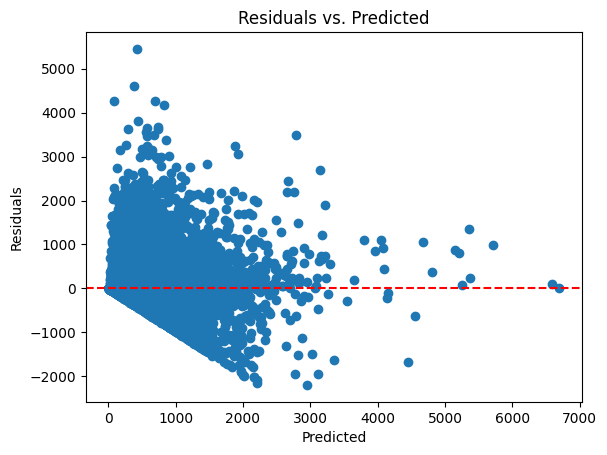

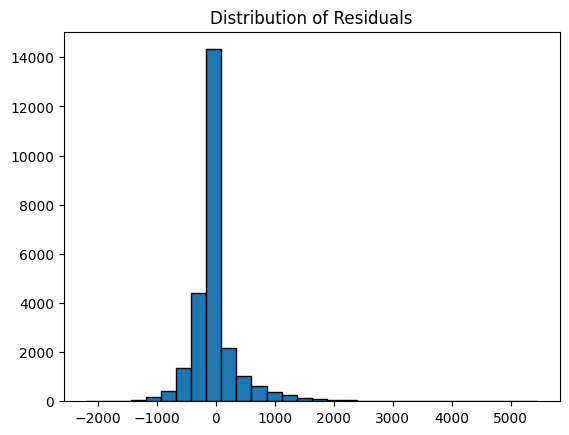

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Predictions on test set
y_pred = regressor.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Explained Variance Score (EVS): {evs}")
print(f"R² Score: {r2}")

# Diagnostic plots
import matplotlib.pyplot as plt

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Residual distribution
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Distribution of Residuals')
plt.show()

# Model Comparison

In [16]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Prepare the independent and dependent variables
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LazyRegressor
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

# Filter for desired models (e.g., top-performing models)
desired_models = ["Linear Regression", "Ridge", "Lasso", "Random Forest", 
                  "Gradient Boosting", "SVR", "KNeighborsRegressor", 
                  "Decision Tree", "XGBoost", "ElasticNet"]

filtered_models = models.loc[models.index.intersection(desired_models)]

# Print the filtered models
print("Filtered Models Performance:")
print(filtered_models)


 98%|█████████▊| 41/42 [1:35:58<03:02, 182.08s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 89444, number of used features: 29
[LightGBM] [Info] Start training from score 380.396320


100%|██████████| 42/42 [1:35:59<00:00, 137.12s/it]

Filtered Models Performance:
                     Adjusted R-Squared  R-Squared   RMSE  Time Taken
Model                                                                
KNeighborsRegressor                0.29       0.29 490.82       10.72
ElasticNet                         0.06       0.06 566.35        0.34
Lasso                              0.06       0.06 567.64       23.45
Ridge                              0.05       0.05 568.75        0.22
SVR                               -0.09      -0.09 610.59     1648.53


In [17]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Random Forest': regressor,
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

KeyboardInterrupt: 

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

# Prepare the independent and dependent variables
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Define models to test
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(),
    "XGBoost": XGBRegressor(random_state=42),
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "R²": r2, "MAE": mae, "MSE": mse})

# Display results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("Performance of Models with PCA:")
print(results_df)

Performance of Models with PCA:
               Model     R²    MAE         MSE
2            XGBoost   0.34 296.45   224745.74
0  Gradient Boosting   0.21 344.70   269987.06
1              Ridge -29.60 402.31 10445881.62


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Prepare the independent and dependent variables
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Split dataset into train and test first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (fit on training set only to prevent leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data only

# Apply PCA (fit on training set only to prevent leakage)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
X_test_pca = pca.transform(X_test_scaled)        # Transform test data only

print(f"Original shape: {X.shape}")
print(f"Reduced shape after PCA: {X_train_pca.shape}")

# Train a model (Random Forest as an example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

Original shape: (127778, 38)
Reduced shape after PCA: (89444, 31)
R²: 0.35983695970631724
MAE: 277.73076931420707
MSE: 218507.75267665976


In [24]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare the independent and dependent variables
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (fit only on training data)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Use LazyRegressor
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_regressor.fit(X_train_pca, X_test_pca, y_train, y_test)

# Display the performance metrics
print("Performance of Models with LazyPredict:")
print(models)

 98%|█████████▊| 41/42 [2:17:59<04:33, 273.88s/it]   

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 89444, number of used features: 31
[LightGBM] [Info] Start training from score 380.396320


100%|██████████| 42/42 [2:18:01<00:00, 197.17s/it]

Performance of Models with LazyPredict:
                                        Adjusted R-Squared  \
Model                                                        
RandomForestRegressor                                 0.36   
XGBRegressor                                          0.34   
BaggingRegressor                                      0.31   
ExtraTreesRegressor                                   0.30   
LGBMRegressor                                         0.30   
HistGradientBoostingRegressor                         0.30   
KNeighborsRegressor                                   0.28   
GradientBoostingRegressor                             0.20   
MLPRegressor                                          0.14   
PoissonRegressor                                      0.07   
GammaRegressor                                        0.05   
ElasticNet                                            0.05   
TweedieRegressor                                      0.05   
ElasticNetCV                  